# Fintech Assignment 02
**\*\*\*Lu Youcong\*\*\***  
**MDS 2021 Term 01**  
**2021/09/27**  
  

## Content <a id="0.1"></a>
* [1. Renrendai loans](#1)
   * [1.1 Data Summary](#1.1)
   * [1.2 Feature cleanning and engeenering](#1.2)
       * [1.2.1 On Default regression](#1.2.1)
       * [1.2.2 On Bids regression](#1.2.2)
   * [1.3 Logit regression](#1.3)
       * [1.3.1 Logit regression Model selection](#1.3.1)
       * [1.3.2 Logit regression Conlusion](#1.3.2) 
       * [1.3.3 Further study a comparison between logit regression and random forest](#1.3.3)
   * [1.4 Ols Regression](#1.4)
* [2. P2P lending platform](#2)
   * [2.1 Datasummary](#2.1)
   * [2.2 Cox Model](#2.2)  
     
  Notebook and related Resource:   
  <u>https://github.com/Lawrence-Lu/Jupyter_git.git</u>

<a id="1"></a>
## 1.Renrendai loans

<a id="1.1"></a>
##  1.1 Data Summary

In this part we overlook all the data in "Renrendai". And I will look at the whole picture of the data. Lately in 1.2 I will 
kick start some detailed feature engeneering based on the problem we are facing

**(1) Data Description**  
We found there are total 10k records X 25 features.  
Most of the features contained clean data except serval features contain incomplete data  
 (
    EDUCATION    9996 non-null   float64  
    WORKTIME     9994 non-null   float64  
    INCOME       9998 non-null   float64  
    IND          9318 non-null   object  
    CITY         9857 non-null   object   
    PURPOSE  9994 non -null       object
 )  
 
 
 **(2)Feature transforming**   
 There are 10 features are objects including: STATUS, IND-Industry, City, Purpose, Marry, Open time, Readytime, Title  
 Description, nickname. I transform theses two types of data since it may be useful   
 2.1) I transform time value from time to integer for further study,only keeping duration(Ready time -Open time)  
 2.2) Create dummy variables for Lable feature with few types including: Marry, Purpose, IND
   
 [Back to content](#0.1)

In [16]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [17]:
data = pd.read_csv(r"..\Week 2 Assignment\loanraw.csv",encoding="gbk")
data.head()

,loanId,STATUS,BIDS,DEFAULT,AMOUNT,INTEREST,MONTHS,CREDIT,HOUSE,CAR,...,IND,CITY,PURPOSE,MARRY,AGE,opentime,readytime,title,description,nickName
0,2,CLOSED,9,0,3000,5.0,6,7,1,1,...,IT,北京,其他借款,未婚,33,2010/10/12 17:17,2010/10/15 11:00,庆祝上线,"看着人人贷经过精心的筹备,和长时间的内测,终于正式和大家见面了.特地来发个标, 希望大家多多...",一夫
1,11,CLOSED,8,0,3000,18.0,3,3,0,0,...,教育/培训,北京,其他借款,未婚,37,2010/10/18 16:40,2010/10/21 17:07,增加信用，重新发布借款,第一次借款不幸失败，这次特意做了收入审核。希望之前支持的朋友继续支持我，新朋友也可以看看我做...,郭遐
2,16,CLOSED,8,0,3000,12.0,12,3,0,0,...,教育/培训,北京,其他借款,未婚,37,2010/10/21 17:26,2010/10/28 14:35,积累信用，继续发标,做过收入认证果然不一样，第一次发标失败了，第二次做了收入认证很快就满标了。 这次降低一点利率...,郭遐
3,19,CLOSED,11,0,3000,8.8,12,7,1,1,...,IT,北京,其他借款,未婚,33,2010/10/25 17:19,2010/10/28 20:58,信用与人人贷一起进步,刚才提前还清了第一笔借款，以证明自己的信用。再次发标只为继续积累信用和人气。希望朋友们投标。...,一夫
4,20,CLOSED,15,0,5000,15.0,12,7,0,1,...,其它,北京,个人消费,未婚,33,2010/10/26 14:29,2010/10/28 14:34,刚刚搬出来自己住，借钱添置些东西,工作也有两年多了，打算自己搬出来住了. 房子已经租好了，跟一个朋友合住，我一个月出1200....,小猫Mia


In [18]:
data.shape

(10000, 25)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanId       10000 non-null  int64  
 1   STATUS       10000 non-null  object 
 2   BIDS         10000 non-null  int64  
 3   DEFAULT      10000 non-null  int64  
 4   AMOUNT       10000 non-null  int64  
 5   INTEREST     10000 non-null  float64
 6   MONTHS       10000 non-null  int64  
 7   CREDIT       10000 non-null  int64  
 8   HOUSE        10000 non-null  int64  
 9   CAR          10000 non-null  int64  
 10  HOUSE_L      10000 non-null  int64  
 11  CAR_L        10000 non-null  int64  
 12  EDUCATION    9996 non-null   float64
 13  WORKTIME     9994 non-null   float64
 14  INCOME       9998 non-null   float64
 15  IND          9318 non-null   object 
 16  CITY         9857 non-null   object 
 17  PURPOSE      9994 non-null   object 
 18  MARRY        10000 non-null  object 
 19  AGE  

***Construct new feature "duration"***  
based on the gap between "readytime" and "opentime" (accurate to hour), using day as unit

In [20]:
data['duration'] = (pd.to_datetime(data["readytime"]) - pd.to_datetime(data["opentime"])).astype('timedelta64[h]').astype(float)/24
data.describe()['duration']

count    10000.000000
mean         3.769125
std          4.548706
min         -0.500000
25%          0.000000
50%          2.625000
75%          5.708333
max         37.375000
Name: duration, dtype: float64

***Construct new dummy variables for label features***  
MARRY: 4 possible status
PURPOSE: 10 possible status
IND : 20 possible status

In [21]:
data_2 = pd.get_dummies(data,columns=["MARRY","PURPOSE","IND"])

In [22]:
data_2.columns

Index(['loanId', 'STATUS', 'BIDS', 'DEFAULT', 'AMOUNT', 'INTEREST', 'MONTHS',
       'CREDIT', 'HOUSE', 'CAR', 'HOUSE_L', 'CAR_L', 'EDUCATION', 'WORKTIME',
       'INCOME', 'CITY', 'AGE', 'opentime', 'readytime', 'title',
       'description', 'nickName', 'duration', 'MARRY_丧偶', 'MARRY_已婚',
       'MARRY_未婚', 'MARRY_离异', 'PURPOSE_个人消费', 'PURPOSE_其他借款', 'PURPOSE_医疗支出',
       'PURPOSE_婚礼筹备', 'PURPOSE_投资创业', 'PURPOSE_教育培训', 'PURPOSE_短期周转',
       'PURPOSE_装修借款', 'PURPOSE_购房借款', 'PURPOSE_购车借款', 'IND_IT', 'IND_交通运输业',
       'IND_体育/艺术', 'IND_公共事业', 'IND_公益组织', 'IND_其它', 'IND_农业', 'IND_制造业',
       'IND_医疗/卫生/保健', 'IND_娱乐服务业', 'IND_媒体/广告', 'IND_建筑工程', 'IND_房地产业',
       'IND_政府机关', 'IND_教育/培训', 'IND_能源业', 'IND_计算机系统', 'IND_金融/法律',
       'IND_零售/批发', 'IND_餐饮/旅馆业'],
      dtype='object')

***Data summary based on experience***  
Bowrrer characteristics: Credit, car, house, education, worktime, Income   
Loan characteristics: Amount, interest,MONTHS, duration

In [23]:
data_2.describe()[["CREDIT","CAR","HOUSE","EDUCATION","INCOME","WORKTIME"]]

,CREDIT,CAR,HOUSE,EDUCATION,INCOME,WORKTIME
count,10000.00000,10000.000000,10000.000000,9996.000000,9998.000000,9994.000000
mean,2.14630,0.391700,0.564500,2.165966,4.309162,2.838003
std,1.53099,0.488155,0.495847,0.818108,1.335842,0.992755
min,1.00000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.00000,0.000000,0.000000,2.000000,3.000000,2.000000
50%,2.00000,0.000000,1.000000,2.000000,4.000000,3.000000
75%,3.00000,1.000000,1.000000,3.000000,5.000000,4.000000
max,7.00000,1.000000,1.000000,4.000000,7.000000,4.000000


In [24]:
data_2.describe()[["AMOUNT","INTEREST","MONTHS","duration"]]

,AMOUNT,INTEREST,MONTHS,duration
count,10000.000000,10000.000000,10000.00000,10000.000000
mean,24545.835000,12.621900,12.23730,3.769125
std,38280.756524,2.273689,8.09109,4.548706
min,3000.000000,5.000000,3.00000,-0.500000
25%,8000.000000,11.000000,6.00000,0.000000
50%,14400.000000,12.000000,12.00000,2.625000
75%,26000.000000,13.000000,12.00000,5.708333
max,500000.000000,24.400000,36.00000,37.375000


<a id="1.2"></a>
## 1.2 Feature cleaning and engineering
   * [1.2.1 On Default regression](#1.2.1)
   * [1.2.2 On Bids regression](#1.2.2)

<a id="1.2.1"></a>
### 1.2.1 On Default regression
**(1) correlation test**   
 Based on the correlation result, I just take the four features ahead of loanId for two reasons.  
 a) loanId is not supposed to related to the likelihood of default based on basic bussiness logic. So I only take features defeat loanId  
 b) Based on my own experience, usually, features show a rate above 0.1 are likely to have a good performance in models
 
**(2) Data Cleaning**    
EDUCATION feature needs to be clean up: Because the number of missing records is small it belongs to discrete feature. I simply use median to fill the null value

 [Back to content](#0.1)

There are no missing records in BIDS

In [25]:
data_2["DEFAULT"].value_counts()

0    8487
1    1513
Name: DEFAULT, dtype: int64

**Correlatin test**  
Based on the result, I pick top 10 for further discussion

In [26]:
abs(data_2.corr()["DEFAULT"]).sort_values(ascending=False)[0:41]

DEFAULT         1.000000
CREDIT          0.292815
MONTHS          0.274555
EDUCATION       0.154944
CAR             0.095841
loanId          0.094200
INTEREST        0.082417
MARRY_离异        0.080191
PURPOSE_装修借款    0.072103
HOUSE_L         0.070177
PURPOSE_购车借款    0.059450
PURPOSE_短期周转    0.054436
IND_IT          0.053042
duration        0.047243
PURPOSE_个人消费    0.044998
HOUSE           0.036634
IND_交通运输业       0.033180
IND_零售/批发       0.032275
AGE             0.026891
PURPOSE_投资创业    0.026225
IND_金融/法律       0.026032
CAR_L           0.024758
WORKTIME        0.023593
IND_制造业         0.022934
IND_农业          0.020576
PURPOSE_教育培训    0.020135
PURPOSE_其他借款    0.020104
IND_政府机关        0.018748
MARRY_未婚        0.017888
IND_能源业         0.016393
BIDS            0.015241
IND_其它          0.014405
IND_体育/艺术       0.014041
IND_建筑工程        0.013458
MARRY_已婚        0.013389
IND_教育/培训       0.011902
IND_餐饮/旅馆业      0.010136
IND_医疗/卫生/保健    0.009476
PURPOSE_购房借款    0.009074
IND_公益组织        0.007794


In [27]:
abs(data_2.corr()["DEFAULT"]).sort_values(ascending=False)[0:11]
index = abs(data_2.corr()["DEFAULT"]).sort_values(ascending=False)[1:11].index

DEFAULT         1.000000
CREDIT          0.292815
MONTHS          0.274555
EDUCATION       0.154944
CAR             0.095841
loanId          0.094200
INTEREST        0.082417
MARRY_离异        0.080191
PURPOSE_装修借款    0.072103
HOUSE_L         0.070177
PURPOSE_购车借款    0.059450
Name: DEFAULT, dtype: float64

<AxesSubplot:>

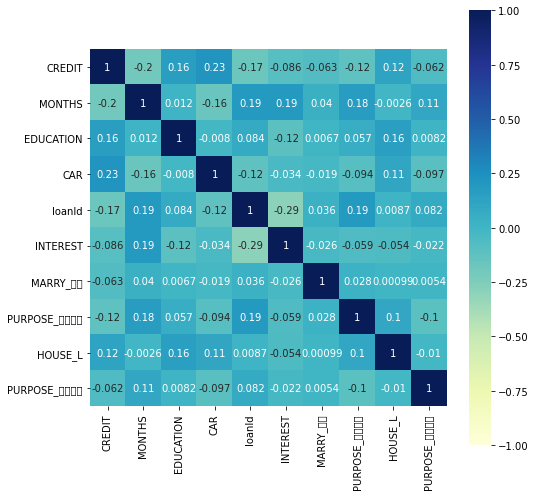

In [38]:
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(data_2[index].corr(),annot=True, vmax=1, vmin=-1,square=True,cmap="YlGnBu")

**Heatmap for rank 10 features**
In these 10 features, they are not highly related to each other, So I do not drop a feature

<AxesSubplot:>

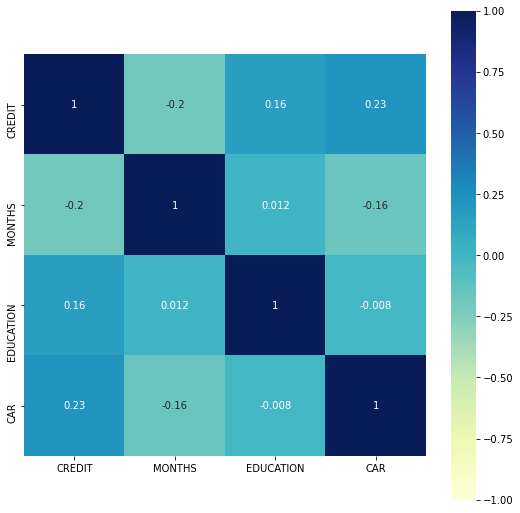

In [29]:
fig, ax = plt.subplots(figsize = (9,9))
sns.heatmap(data_2[["CREDIT","MONTHS","EDUCATION","CAR"]].corr(),annot=True, vmax=1, vmin=-1,square=True,cmap="YlGnBu")

**Heatmap for rank 4 features (features beat loan id)**   
To show the data better I draw a heatmap only for 4 high ranked features.  
In these four features, they are not highly related to each other, So I do not drop a feature

In [30]:
data_2.describe()[["CREDIT","MONTHS","EDUCATION","CAR"]]

,CREDIT,MONTHS,EDUCATION,CAR
count,10000.00000,10000.00000,9996.000000,10000.000000
mean,2.14630,12.23730,2.165966,0.391700
std,1.53099,8.09109,0.818108,0.488155
min,1.00000,3.00000,1.000000,0.000000
25%,1.00000,6.00000,2.000000,0.000000
50%,2.00000,12.00000,2.000000,0.000000
75%,3.00000,12.00000,3.000000,1.000000
max,7.00000,36.00000,4.000000,1.000000


**Filling null value in EDUCATION feature**

In [31]:
data_2["EDUCATION"][data_2["EDUCATION"].isnull()] = data_2["EDUCATION"].median()

<ipython-input-31-2bafad20e43f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["EDUCATION"][data_2["EDUCATION"].isnull()] = data_2["EDUCATION"].median()


In [32]:
data_2.describe()[["CREDIT","MONTHS","EDUCATION","CAR"]]

,CREDIT,MONTHS,EDUCATION,CAR
count,10000.00000,10000.00000,10000.000000,10000.000000
mean,2.14630,12.23730,2.165900,0.391700
std,1.53099,8.09109,0.817951,0.488155
min,1.00000,3.00000,1.000000,0.000000
25%,1.00000,6.00000,2.000000,0.000000
50%,2.00000,12.00000,2.000000,0.000000
75%,3.00000,12.00000,3.000000,1.000000
max,7.00000,36.00000,4.000000,1.000000


<a id="1.2.2"></a>
### 1.2.2 On Bids regression
**(1) correlation test**   
I found there are far more features are highly relevant to BIDS  
I select features ranking high from highest AMOUNT to INTEREST。
Then I also create a heat map to filter the features again inorder to avoid multicollinearity

**(2) Filling missing records**  
There are few missing records in INCOME and WORKTIME. Since they are label features.  
Similar to CAR, I simply use median value to fill the records.    

**(3) Feature visualization**  
Because I am about to conduct an OLS regression on the data samle, before that I draw a line based on the top there related features to illustrate how it affects BIDS. However, since it is not a one to one mapping, the line could be messy. Therefore I conduct the **<u>portfolio approach</u>** to illustrate the result.  
Based on the graphs bids increase as long as amount and age increases while income shows a rebound relationship with bids.

 [Back to content](#0.1)

There are no missing records in BIDS

In [33]:
data_2.describe()['BIDS']

count    10000.000000
mean        24.150600
std         41.342608
min          1.000000
25%          9.000000
50%         15.000000
75%         24.000000
max        592.000000
Name: BIDS, dtype: float64

In [34]:
abs(data_2.corr()["BIDS"]).sort_values(ascending=False)[1:13]
bidsIndex_0 = abs(data_2.corr()["BIDS"]).sort_values(ascending=False)[1:13].index

AMOUNT          0.809234
INCOME          0.357055
AGE             0.257725
IND_制造业         0.188173
CAR             0.183072
loanId          0.159011
WORKTIME        0.139645
CREDIT          0.122454
MARRY_已婚        0.122299
MARRY_未婚        0.117044
PURPOSE_其他借款    0.105537
INTEREST        0.097306
Name: BIDS, dtype: float64

**According to the heatmap**  
I found two status of marriage is highly related, So I drop the dismarriaged feature

<AxesSubplot:>

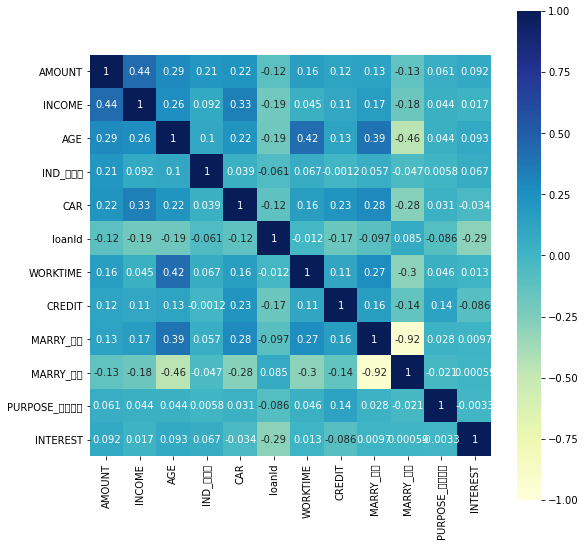

In [36]:
fig, ax = plt.subplots(figsize = (9,9))
sns.heatmap(data_2[bidsIndex_0].corr(),annot=True, vmax=1, vmin=-1,square=True,cmap="YlGnBu")

In [21]:
bidsIndex_0 = bidsIndex_0.drop("MARRY_未婚")
bidsIndex_0

Index(['AMOUNT', 'INCOME', 'AGE', 'IND_制造业', 'CAR', 'loanId', 'WORKTIME',
       'CREDIT', 'MARRY_已婚', 'PURPOSE_其他借款', 'INTEREST'],
      dtype='object')

In [22]:
data_2.describe()[bidsIndex_0]

,AMOUNT,INCOME,AGE,IND_制造业,CAR,loanId,WORKTIME,CREDIT,MARRY_已婚,PURPOSE_其他借款,INTEREST
count,10000.000000,9998.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,9994.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,24545.835000,4.309162,34.755500,0.199700,0.391700,4.188469e+05,2.838003,2.14630,0.638500,0.047100,12.621900
std,38280.756524,1.335842,6.682708,0.399795,0.488155,4.464326e+05,0.992755,1.53099,0.480459,0.211863,2.273689
min,3000.000000,1.000000,24.000000,0.000000,0.000000,2.000000e+00,1.000000,1.00000,0.000000,0.000000,5.000000
25%,8000.000000,3.000000,30.000000,0.000000,0.000000,8.463525e+04,2.000000,1.00000,0.000000,0.000000,11.000000
50%,14400.000000,4.000000,33.000000,0.000000,0.000000,3.219450e+05,3.000000,2.00000,1.000000,0.000000,12.000000
75%,26000.000000,5.000000,38.000000,0.000000,1.000000,5.829305e+05,4.000000,3.00000,1.000000,0.000000,13.000000
max,500000.000000,7.000000,53.000000,1.000000,1.000000,2.086049e+06,4.000000,7.00000,1.000000,1.000000,24.400000


**Filling missing records for INCOME and WORKTIME**

In [23]:
data_2["INCOME"][data_2["INCOME"].isnull()] = data_2["INCOME"].median()
data_2["WORKTIME"][data_2["WORKTIME"].isnull()] = data_2["WORKTIME"].median()
data_2.describe()[bidsIndex_0]

<ipython-input-23-7b60960dbc47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["INCOME"][data_2["INCOME"].isnull()] = data_2["INCOME"].median()
<ipython-input-23-7b60960dbc47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2["WORKTIME"][data_2["WORKTIME"].isnull()] = data_2["WORKTIME"].median()


,AMOUNT,INCOME,AGE,IND_制造业,CAR,loanId,WORKTIME,CREDIT,MARRY_已婚,PURPOSE_其他借款,INTEREST
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,24545.835000,4.309100,34.755500,0.199700,0.391700,4.188469e+05,2.838100,2.14630,0.638500,0.047100,12.621900
std,38280.756524,1.335715,6.682708,0.399795,0.488155,4.464326e+05,0.992465,1.53099,0.480459,0.211863,2.273689
min,3000.000000,1.000000,24.000000,0.000000,0.000000,2.000000e+00,1.000000,1.00000,0.000000,0.000000,5.000000
25%,8000.000000,3.000000,30.000000,0.000000,0.000000,8.463525e+04,2.000000,1.00000,0.000000,0.000000,11.000000
50%,14400.000000,4.000000,33.000000,0.000000,0.000000,3.219450e+05,3.000000,2.00000,1.000000,0.000000,12.000000
75%,26000.000000,5.000000,38.000000,0.000000,1.000000,5.829305e+05,4.000000,3.00000,1.000000,0.000000,13.000000
max,500000.000000,7.000000,53.000000,1.000000,1.000000,2.086049e+06,4.000000,7.00000,1.000000,1.000000,24.400000


### To illustrate the relationship better we plot the figure
Relationship between BIDS and threee most significant features using portfolio approach

Cutting data 

In [24]:
data_2.loc[:,"AMOUNTLABEL"] = pd.cut(data["AMOUNT"],5)
data_2.loc[:,"AGELABEL"] = pd.cut(data["AGE"],3)

In [25]:
data_2["AMOUNTLABEL"].value_counts()
data_2["AGELABEL"].value_counts()

(2503.0, 102400.0]      9732
(102400.0, 201800.0]     186
(201800.0, 301200.0]      63
(400600.0, 500000.0]      11
(301200.0, 400600.0]       8
Name: AMOUNTLABEL, dtype: int64

(23.971, 33.667]    5053
(33.667, 43.333]    3702
(43.333, 53.0]      1245
Name: AGELABEL, dtype: int64

In [26]:
amountLabels = []
for label in data_2["AMOUNTLABEL"].value_counts().index:
    amountLabels.append(str(label))

incomeLabels = [1,2,3,4,5,6,7]
ageLabels = ["23-33","33-43","43-53"]


**Feature visualization**  
Because I am about to conduct an OLS regression on the data samle, before that I draw a line based on the top there related features to illustrate how it affects BIDS. However, since it is not a one to one mapping, the line could be messy. Therefore I conduct the **<u>portfolio approach</u>** to illustrate the result.  
Based on the graphs bids increase as long as amount and age increases while income shows a rebound relationship with bids.

<Figure size 1008x576 with 0 Axes>

<AxesSubplot:>

Text(0.5, 0, 'AMOUNT')

Text(0, 0.5, 'BIDS')

<AxesSubplot:>

Text(0.5, 0, 'INCOME')

<AxesSubplot:>

Text(0.5, 0, 'AGE')

<function matplotlib.pyplot.show(close=None, block=None)>

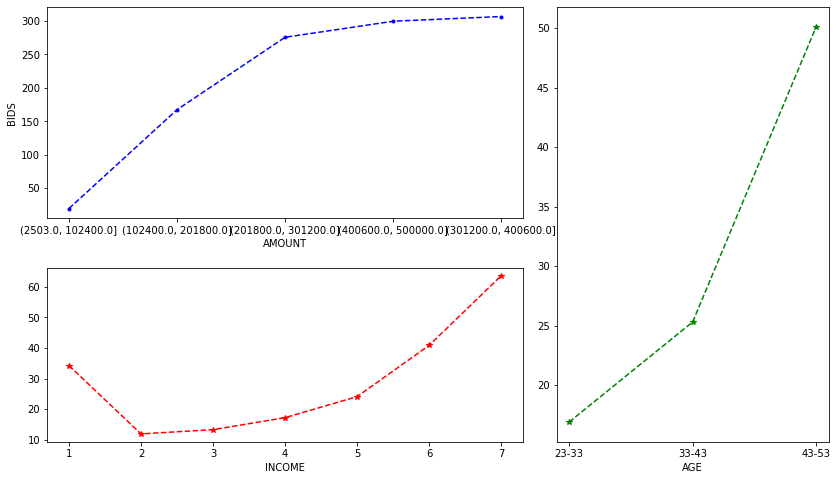

In [27]:
plt.figure(figsize=[14, 8])
grid = plt.GridSpec(12, 8, wspace=0.5, hspace=0.5)
plt.subplot(grid[0:6,0:5])

plt.plot(amountLabels,data_2.groupby(["AMOUNTLABEL"])["BIDS"].mean(),"b--.")

plt.xlabel("AMOUNT")
plt.ylabel("BIDS")

plt.subplot(grid[7:12,0:5])

plt.plot(incomeLabels,data_2.groupby(["INCOME"])["BIDS"].mean(),"r--*")
plt.xlabel("INCOME")


plt.subplot(grid[0:12,5:8])

plt.plot(ageLabels,data_2.groupby(["AGELABEL"])["BIDS"].mean(),"g--*")
plt.xlabel("AGE")
plt.show

<a id="1.3"></a>
### 1.3 Logit Regression
   * [1.3.1 Logit regression Model selection](#1.3.1)
   * [1.3.2 Logit regression Conlusion](#1.3.2) 

<a id="1.3.1"></a>
### 1.3 .1Logit Regression Model Selecion
In this part I fit the model with the features adpoted from the last step.  
Then I select features and improve models based on each result namely, R-squared score , p-value of feature etc.

1. The first model contains all the features, but several features in it is not significant such as CAR, two purpose and so on  
2. The second model remove CAR feature
3. The third model remove purpose-购车借款
4. Remove loan id which is not relevant to the result based on life experience
5. Remove interest because it is now insignificant. Now the fifth model seems perfect with no useless features and rather high
R-square
6. Remove the only remained not bowrrower characteristic feature-Months, find the result was badly infected.
7. Therefore the fifth model is the final model we get.  
  
   
  [Back to content](#0.1)

Add Intercet into data

In [28]:
data_2["intercept"] = 1.0

In [29]:
cols = []
for x in index: cols.append(str(x))
cols.append("intercept")
cols

['CREDIT',
 'MONTHS',
 'EDUCATION',
 'CAR',
 'loanId',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款',
 'intercept']

#### Fit the first logit model with all variables

In [30]:
model = sm.Logit(data_2['DEFAULT'],data_2[cols])
result1 = model.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.300684
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.2924
Time:                        16:43:37   Log-Likelihood:                -3006.8
converged:                       True   LL-Null:                       -4249.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CREDIT          -1.9959      0.088    -22.628      0.000      -2.169      -1.823
MONTHS           0.0739      0.004     19.270      0.000       0.066       0.081
EDUCATION       -0.5459      0.043    -12.640      0.000      -0.631      -0.461
CAR              0.0388      0.072      0.538      0.591      -0.103       0.180
loanId        8.013e-07   7.72e-08     10.377      0.000     6.5e-07    9.53e-07
INTEREST         0.0645      0.016      3.974      0.000       0.033       0.096
MARRY_离异         0.8014      0.141      5.671      0.000       0.524       1.078
PURPOSE_装修借款     0.1959      0.082      2.404      0.016       0.036       0.356
HOUSE_L         -0.3119      0.088     -3.560      0.000      -0.484      -0.140
PURPOSE_购车借款     0.2600      0.134      1.935      0.053      -0.003       0.523
intercept       -0.1468      0.261     -0.563      0.573      -0.657       0.364
================================================================================
"""

In [31]:
cols.pop(3)
cols

'CAR'

['CREDIT',
 'MONTHS',
 'EDUCATION',
 'loanId',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款',
 'intercept']

**Fit the second model droping CAR**

In [32]:

model = sm.Logit(data_2['DEFAULT'],data_2[cols])
result2 = model.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.300698
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.2924
Time:                        16:43:37   Log-Likelihood:                -3007.0
converged:                       True   LL-Null:                       -4249.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CREDIT          -1.9934      0.088    -22.635      0.000      -2.166      -1.821
MONTHS           0.0737      0.004     19.300      0.000       0.066       0.081
EDUCATION       -0.5457      0.043    -12.636      0.000      -0.630      -0.461
loanId        7.994e-07   7.71e-08     10.362      0.000    6.48e-07    9.51e-07
INTEREST         0.0641      0.016      3.956      0.000       0.032       0.096
MARRY_离异         0.8016      0.141      5.672      0.000       0.525       1.079
PURPOSE_装修借款     0.1926      0.081      2.370      0.018       0.033       0.352
HOUSE_L         -0.3059      0.087     -3.521      0.000      -0.476      -0.136
PURPOSE_购车借款     0.2533      0.134      1.893      0.058      -0.009       0.516
intercept       -0.1299      0.259     -0.502      0.616      -0.637       0.377
================================================================================
"""

In [33]:
cols.pop(8)
cols

'PURPOSE_购车借款'

['CREDIT',
 'MONTHS',
 'EDUCATION',
 'loanId',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'intercept']

**Fit the Third model droping PURPOSE_购车借款**

In [34]:

model = sm.Logit(data_2['DEFAULT'],data_2[cols])
result3 = model.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.300875
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.2920
Time:                        16:43:37   Log-Likelihood:                -3008.7
converged:                       True   LL-Null:                       -4249.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CREDIT          -1.9960      0.088    -22.657      0.000      -2.169      -1.823
MONTHS           0.0747      0.004     19.715      0.000       0.067       0.082
EDUCATION       -0.5454      0.043    -12.634      0.000      -0.630      -0.461
loanId        8.041e-07   7.71e-08     10.429      0.000    6.53e-07    9.55e-07
INTEREST         0.0630      0.016      3.893      0.000       0.031       0.095
MARRY_离异         0.8019      0.141      5.678      0.000       0.525       1.079
PURPOSE_装修借款     0.1684      0.080      2.098      0.036       0.011       0.326
HOUSE_L         -0.3068      0.087     -3.530      0.000      -0.477      -0.136
intercept       -0.1093      0.258     -0.423      0.672      -0.616       0.397
================================================================================
"""

In [35]:
cols.pop(3)
cols

'loanId'

['CREDIT',
 'MONTHS',
 'EDUCATION',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'intercept']

**Fit the Fourth model droping loanId**

In [36]:

model = sm.Logit(data_2['DEFAULT'],data_2[cols])
result4 = model.fit()
result4.summary()

Optimization terminated successfully.
         Current function value: 0.306135
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.2796
Time:                        16:43:37   Log-Likelihood:                -3061.4
converged:                       True   LL-Null:                       -4249.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CREDIT          -1.8746      0.084    -22.218      0.000      -2.040      -1.709
MONTHS           0.0789      0.004     21.000      0.000       0.072       0.086
EDUCATION       -0.5103      0.042    -12.042      0.000      -0.593      -0.427
INTEREST         0.0099      0.016      0.639      0.523      -0.021       0.040
MARRY_离异         0.8011      0.140      5.708      0.000       0.526       1.076
PURPOSE_装修借款     0.2557      0.079      3.223      0.001       0.100       0.411
HOUSE_L         -0.3273      0.086     -3.788      0.000      -0.497      -0.158
intercept        0.6634      0.248      2.680      0.007       0.178       1.149
================================================================================
"""

In [37]:
cols.pop(3)
cols

'INTEREST'

['CREDIT',
 'MONTHS',
 'EDUCATION',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'intercept']

**Fit the Fifth model droping Interest**

In [38]:
model = sm.Logit(data_2['DEFAULT'],data_2[cols])
result5 = model.fit()
result5.summary()

Optimization terminated successfully.
         Current function value: 0.306155
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.2796
Time:                        16:43:38   Log-Likelihood:                -3061.6
converged:                       True   LL-Null:                       -4249.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CREDIT          -1.8790      0.084    -22.319      0.000      -2.044      -1.714
MONTHS           0.0793      0.004     21.346      0.000       0.072       0.087
EDUCATION       -0.5124      0.042    -12.123      0.000      -0.595      -0.430
MARRY_离异         0.7979      0.140      5.691      0.000       0.523       1.073
PURPOSE_装修借款     0.2514      0.079      3.182      0.001       0.097       0.406
HOUSE_L         -0.3275      0.086     -3.791      0.000      -0.497      -0.158
intercept        0.7967      0.133      5.981      0.000       0.536       1.058
================================================================================
"""

In [39]:
cols.pop(1)
cols

'MONTHS'

['CREDIT', 'EDUCATION', 'MARRY_离异', 'PURPOSE_装修借款', 'HOUSE_L', 'intercept']

**Fit the Sixth model droping MONTHS**

In [40]:
model = sm.Logit(data_2['DEFAULT'],data_2[cols])
result6 = model.fit()
result6.summary()

Optimization terminated successfully.
         Current function value: 0.330429
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.2224
Time:                        16:43:38   Log-Likelihood:                -3304.3
converged:                       True   LL-Null:                       -4249.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CREDIT          -1.8938      0.083    -22.838      0.000      -2.056      -1.731
EDUCATION       -0.4481      0.040    -11.238      0.000      -0.526      -0.370
MARRY_离异         0.8082      0.133      6.059      0.000       0.547       1.070
PURPOSE_装修借款     0.4790      0.075      6.386      0.000       0.332       0.626
HOUSE_L         -0.3142      0.083     -3.806      0.000      -0.476      -0.152
intercept        1.7775      0.123     14.459      0.000       1.537       2.018
================================================================================
"""

In [41]:
final_cols = ['CREDIT', 'MONTHS','EDUCATION', 'MARRY_离异', 'PURPOSE_装修借款', 'HOUSE_L', 'intercept']

In [42]:
model = sm.Logit(data_2['DEFAULT'],data_2[final_cols])
result7 = model.fit()
result7.summary()

Optimization terminated successfully.
         Current function value: 0.306155
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                DEFAULT   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.2796
Time:                        16:43:38   Log-Likelihood:                -3061.6
converged:                       True   LL-Null:                       -4249.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
CREDIT          -1.8790      0.084    -22.319      0.000      -2.044      -1.714
MONTHS           0.0793      0.004     21.346      0.000       0.072       0.087
EDUCATION       -0.5124      0.042    -12.123      0.000      -0.595      -0.430
MARRY_离异         0.7979      0.140      5.691      0.000       0.523       1.073
PURPOSE_装修借款     0.2514      0.079      3.182      0.001       0.097       0.406
HOUSE_L         -0.3275      0.086     -3.791      0.000      -0.497      -0.158
intercept        0.7967      0.133      5.981      0.000       0.536       1.058
================================================================================
"""

<a id="1.3.2"></a>
### 1.3.2 Logit model Sum up
Finally, we get illustrate all the models in a table
we can draw the conclusion.

***(1)*** Compated to other model the senventh model is the final model. It contains no insignificant features and contains a rather 
satifactory score.

Among all the features left, credit, education, house_L has negative effect on Default. It means if someone has higher credits, or better education background or house_L he is less likely to default.  
Months,Marry_离异,Purpose_装修借款， has positive effect on Default likelihood.

***(2)***  However, if we can only include bowrrowers' characteristic instead of features about the trade. We should use model 6.
  
   [Back to content](#0.1)


In [43]:
def sum_up(result_list):
    for m in range(len(result_list)):
        temp = []
        result = result_list[m]
        for i in range(len(result.params)):
            text = str('{:.3e}'.format(result.params[i])) + "   " + "( " + result.pvalues[i].round(3).astype("str") +" )"
            temp.append(text)
        if m==0:
            df = pd.DataFrame({"Model 1" : temp},index = result.params.index)
        else:
            column = "Model " + str(m+1)
            df = df.join(pd.DataFrame({column : temp},index = result.params.index))
    return df
    
        
            

In [44]:

result_list = [result1,result2,result3,result4,result5,result6,result7]
df = sum_up(result_list)
r_squares = []
for result in result_list:
    r_squares.append('{:.4f}'.format(result.prsquared))
pd.concat([df,pd.DataFrame([r_squares],columns=["Model 1","Model 2","Model 3","Model 4","Model 5","Model 6","Model 7"],index=["R-Square"])])

,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6,Model 7
CREDIT,-1.996e+00 ( 0.0 ),-1.993e+00 ( 0.0 ),-1.996e+00 ( 0.0 ),-1.875e+00 ( 0.0 ),-1.879e+00 ( 0.0 ),-1.894e+00 ( 0.0 ),-1.879e+00 ( 0.0 )
MONTHS,7.391e-02 ( 0.0 ),7.373e-02 ( 0.0 ),7.467e-02 ( 0.0 ),7.893e-02 ( 0.0 ),7.931e-02 ( 0.0 ),NaN,7.931e-02 ( 0.0 )
EDUCATION,-5.459e-01 ( 0.0 ),-5.457e-01 ( 0.0 ),-5.454e-01 ( 0.0 ),-5.103e-01 ( 0.0 ),-5.124e-01 ( 0.0 ),-4.481e-01 ( 0.0 ),-5.124e-01 ( 0.0 )
CAR,3.878e-02 ( 0.591 ),NaN,NaN,NaN,NaN,NaN,NaN
loanId,8.013e-07 ( 0.0 ),7.994e-07 ( 0.0 ),8.041e-07 ( 0.0 ),NaN,NaN,NaN,NaN
INTEREST,6.446e-02 ( 0.0 ),6.410e-02 ( 0.0 ),6.304e-02 ( 0.0 ),9.946e-03 ( 0.523 ),NaN,NaN,NaN
MARRY_离异,8.014e-01 ( 0.0 ),8.016e-01 ( 0.0 ),8.019e-01 ( 0.0 ),8.011e-01 ( 0.0 ),7.979e-01 ( 0.0 ),8.082e-01 ( 0.0 ),7.979e-01 ( 0.0 )
PURPOSE_装修借款,1.959e-01 ( 0.016 ),1.926e-01 ( 0.018 ),1.684e-01 ( 0.036 ),2.557e-01 ( 0.001 ),2.514e-01 ( 0.001 ),4.790e-01 ( 0.0 ),2.514e-01 ( 0.001 )
HOUSE_L,-3.119e-01 ( 0.0 ),-3.059e-01 ( 0.0 ),-3.068e-01 ( 0.0 ),-3.273e-01 ( 0.0 ),-3.275e-01 ( 0.0 ),-3.142e-01 ( 0.0 ),-3.275e-01 ( 0.0 )
PURPOSE_购车借款,2.600e-01 ( 0.053 ),2.533e-01 ( 0.058 ),NaN,NaN,NaN,NaN,NaN


<a id="1.3.3"></a>
### 1.3.3 Further study a comparison between logit regression and random forest
**(1)** [Comparing logit models from machine learning angle](#1.3.3.1)  
**(2)** [Tranning and adjusting the paramater of Randomforest](#1.3.3.2)  
**(3)** [Comparing logit model and randomforest](#1.3.3.3) 
  
[Back to content](#0.1)

<a id="1.3.3.1"></a>
**<font size=4>(1) Comparing logit models from machine learning angle</font>**   
As a result I found after model selection, with fewer features, the final model has better performance than the first model

In [66]:
Y =data_2["DEFAULT"]
X = data_2[['CREDIT',
 'MONTHS',
 'EDUCATION',
 'CAR',
 'loanId',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款']]
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)

In [68]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg.score(X_train,y_train)
lg.score(X_test,y_test)

LogisticRegression()

0.8492

0.8472

In [69]:
Y = data_2["DEFAULT"]
X = data_2[final_cols]
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)
lg = LogisticRegression()
lg.fit(X_train,y_train)
lg.score(X_train,y_train)
lg.score(X_test,y_test)

LogisticRegression()

0.8621333333333333

0.8568

<a id="1.3.3.2"></a>
**<font size=4>(2) Randomforest Training</font>**  
Since there are few features remained for randomforest,   
I just drop the illogic feature-loanId, and fit the model with better parameter instead of further feature filtering  
  
**Without setting the parm, the score between train set and test set is much larger**  
 To fix the overfitting problem, adjust parm: "max-depth"  
   
**Draw the result at last socre-different max depth**  
Come to a conclusion, max - depth =6 is the best parm.
  
   [Back to 1.3.3](#1.3.3)

In [86]:
score_train = []
score_test = []

In [87]:
Y =data_2["DEFAULT"]
X = data_2[['CREDIT',
 'MONTHS',
 'EDUCATION',
 'CAR',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款']]
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)
clf = RandomForestClassifier( random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
clf.score(X_test,y_test)
score_train.append(clf.score(X_train,y_train))
score_test.append(clf.score(X_test,y_test))

RandomForestClassifier(random_state=0)

0.8906666666666667

0.8528

In [88]:
Y =data_2["DEFAULT"]
X = data_2[['CREDIT',
 'MONTHS',
 'EDUCATION',
 'CAR',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款']]
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)
clf = RandomForestClassifier( max_depth=2,random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
clf.score(X_test,y_test)
score_train.append(clf.score(X_train,y_train))
score_test.append(clf.score(X_test,y_test))

RandomForestClassifier(max_depth=2, random_state=0)

0.8492

0.8472

In [89]:
Y =data_2["DEFAULT"]
X = data_2[['CREDIT',
 'MONTHS',
 'EDUCATION',
 'CAR',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款']]
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)
clf = RandomForestClassifier( max_depth=4,random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
clf.score(X_test,y_test)
score_train.append(clf.score(X_train,y_train))
score_test.append(clf.score(X_test,y_test))

RandomForestClassifier(max_depth=4, random_state=0)

0.8516

0.8476

In [90]:
Y =data_2["DEFAULT"]
X = data_2[['CREDIT',
 'MONTHS',
 'EDUCATION',
 'CAR',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款']]
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)
clf = RandomForestClassifier( max_depth=6,random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
clf.score(X_test,y_test)
score_train.append(clf.score(X_train,y_train))
score_test.append(clf.score(X_test,y_test))

RandomForestClassifier(max_depth=6, random_state=0)

0.8668

0.8652

In [91]:
Y =data_2["DEFAULT"]
X = data_2[['CREDIT',
 'MONTHS',
 'EDUCATION',
 'CAR',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款']]
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)
clf = RandomForestClassifier( max_depth=8,random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
clf.score(X_test,y_test)
score_train.append(clf.score(X_train,y_train))
score_test.append(clf.score(X_test,y_test))

RandomForestClassifier(max_depth=8, random_state=0)

0.8733333333333333

0.862

In [92]:
Y =data_2["DEFAULT"]
X = data_2[['CREDIT',
 'MONTHS',
 'EDUCATION',
 'CAR',
 'INTEREST',
 'MARRY_离异',
 'PURPOSE_装修借款',
 'HOUSE_L',
 'PURPOSE_购车借款']]
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=0)
clf = RandomForestClassifier( max_depth=10,random_state=0)
clf.fit(X_train,y_train)
clf.score(X_train,y_train)
clf.score(X_test,y_test)
score_train.append(clf.score(X_train,y_train))
score_test.append(clf.score(X_test,y_test))

RandomForestClassifier(max_depth=10, random_state=0)

0.8805333333333333

0.8592

**Draw the result at last socre-different max depth**  
Come to a conclusion, max - depth =6 is the best parm. Because, it the test point reaches a local maximizer.  
Besides, it is fairly close to figure of trainset leading to no concern of overfitting problem.

<Figure size 504x432 with 0 Axes>

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Score')

Text(0.5, 1.0, 'Score - Max Depth')

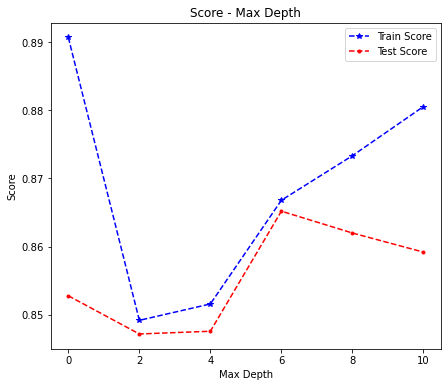

In [105]:
plt.figure(figsize=[7, 6])
x_plot = [0,2,4,6,8,10]
plt.plot(x_plot,score_train,"b--*",label="Train Score")
plt.plot(x_plot,score_test,"r--.",label="Test Score")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.title("Score - Max Depth")
plt.legend()
plt.show()

<a id="1.3.3.3"></a>
**<font size=4>(3) Comparing logit and randomforest</font>**   
From the table we can come to the conclusion that:
Randomforest model scores (0.0047) better on the train set
Randomforest model scores 0.0085 better on the test set.
Obviously logit model has quiet similar performance compared to the random forest model. 
I assume there are two reasons:    

**(1)** The logit model is excellently fitted  
**(2)** The data sample is not perfect for randomforest because there are not enough featues and records.

Although random forest has better performance, it can not explain how each feature affect the result very well

  
  [Back to 1.3.3](#1.3.3)

In [108]:
pd.DataFrame({
    "Logit":[0.8621,0.8568],
    "RandomForest":[0.8668,0.8652]},
    index = ["Train set score","Test set score"]
l
)

,Logit,RandomForest
Train set score,0.8621,0.8668
Test set score,0.8568,0.8652


In [110]:
0.8668 - 0.8621
0.8652 - 0.8568

0.0047000000000000375

0.008399999999999963

<a id="1.4"></a>
### 1.4 OLS Regression
**(1) First Model**    
According to the note 2 in the result, I found there are some series problem in the model leading to an irregular large condition number.   
At the same time when we plot the residual graph, the figure is not like a line,but varied among observations   

**(2) Second Model**   
Based on the tips I assume there is multicollinearity in the model, and based on the correlation test I have done, I have already removed close features. However I keep one feature AMOUNT which is highly related(0.809) to BIDS. I assume it is the reason causing the problem, and it is also rational that there is mullticollinearity between amount and bids from life experience. Since the amount is a result of bids  

The result is a little better, but it still involve a large condition number. 

**(3) Third Model**     
Since there is still a same problem, I assume its cause is another issue-numerical problem. When I look up to the data statistc of the features, I found the feature loan Id is make up of significantly large number compared to other features. And it should not be a explainable based on life experience, so I simply drop it.  
Finally we get model no longer report a large condition number.   

**(4) Fourth and d Fifth Model**   
In these two models I drop insignificant feature a.dummy variable _已婚 and b.Intereset.   
After that I plot a residual graph of the final model. Compared to the model earlier, the line is much more smooth 
  
   [Back to content](#0.1)

In [354]:
bidsIndex = bidsIndex_0

**<font size=4>(1) The First Model</font>**  
According to the note 2 in the result, I found there are some series problem in the model leading to an irregular large condition number.  
At the same time when we plot the residual graph, the figure is not like a line,but varied among observations 

In [355]:
X = data_2[bidsIndex]
Y = data_2["BIDS"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result_ols = model.fit()
result_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BIDS   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1782.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:36:39   Log-Likelihood:                -45978.
No. Observations:               10000   AIC:                         9.198e+04
Df Residuals:                    9988   BIC:                         9.207e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2743      2.203      0.124      0.901      -4.044       4.593
AMOUNT           0.0009    7.3e-06    117.345      0.000       0.001       0.001
INCOME          -0.1936      0.212     -0.913      0.361      -0.609       0.222
AGE              0.0829      0.044      1.879      0.060      -0.004       0.169
IND_制造业          1.9705      0.617      3.196      0.001       0.762       3.179
CAR             -0.4390      0.550     -0.798      0.425      -1.517       0.639
loanId       -5.279e-06   5.91e-07     -8.929      0.000   -6.44e-06   -4.12e-06
WORKTIME         0.1738      0.273      0.636      0.524      -0.362       0.709
CREDIT           0.1792      0.167      1.073      0.283      -0.148       0.507
MARRY_已婚         0.3358      0.562      0.597      0.551      -0.767       1.438
PURPOSE_其他借款     9.9002      1.149      8.617      0.000       7.648      12.152
INTEREST         0.0981      0.113      0.870      0.384      -0.123       0.319
==============================================================================
Omnibus:                     6829.156   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           991338.826
Skew:                           2.351   Prob(JB):                         0.00
Kurtosis:                      51.550   Cond. No.                     5.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

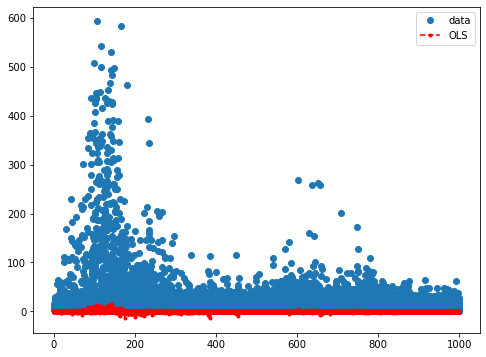

In [356]:
x = np.linspace(0,1000,len(Y))
y_fitted = result_ols.fittedvalues
res = Y - y_fitted
res = (res-res.mean())/res.std()
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, Y, 'o', label='data')
ax.plot(x, res, 'r--.',label='OLS')
ax.legend(loc='best')

**<font size=4>(2) The Second Model</font>**  
Based on the tips I assume there is multicollinearity in the model, and based on the correlation test I have done, I have already removed close features. However I keep one feature AMOUNT which is highly related(0.809) to BIDS. I assume it is the reason causing the problem, and it is also rational that there is mullticollinearity between amount and bids from life experience. Since the amount is a result of bids  

The result is a little better, but it still involve a large condition number. 

In [342]:
bidsIndex = bidsIndex_0
bidsIndex = bidsIndex.drop(['AMOUNT'])
bidsIndex

Index(['INCOME', 'AGE', 'IND_制造业', 'CAR', 'loanId', 'WORKTIME', 'CREDIT',
       'MARRY_已婚', 'PURPOSE_其他借款', 'INTEREST'],
      dtype='object')

In [343]:
X = data_2[bidsIndex]
Y = data_2["BIDS"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result_ols = model.fit()
result_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BIDS   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:31:21   Log-Likelihood:                -50310.
No. Observations:               10000   AIC:                         1.006e+05
Df Residuals:                    9989   BIC:                         1.007e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -67.3928      3.279    -20.552      0.000     -73.821     -60.965
INCOME           8.7481      0.305     28.667      0.000       8.150       9.346
AGE              0.7695      0.067     11.418      0.000       0.637       0.902
IND_制造业         14.3086      0.937     15.273      0.000      12.472      16.145
CAR              3.1661      0.847      3.738      0.000       1.506       4.826
loanId       -3.323e-06   9.11e-07     -3.646      0.000   -5.11e-06   -1.54e-06
WORKTIME         2.2428      0.420      5.336      0.000       1.419       3.067
CREDIT           1.4875      0.257      5.788      0.000       0.984       1.991
MARRY_已婚        -1.8969      0.867     -2.188      0.029      -3.596      -0.197
PURPOSE_其他借款    14.3378      1.771      8.096      0.000      10.866      17.809
INTEREST         1.2182      0.173      7.032      0.000       0.879       1.558
==============================================================================
Omnibus:                    11478.210   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1254822.334
Skew:                           6.011   Prob(JB):                         0.00
Kurtosis:                      56.545   Cond. No.                     5.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**<font size=4>(3) The Third Model</font>**  
Since there is still a same problem, I assume its cause is another issue-numerical problem. When I look up to the data statistc of the features, I found the feature loan Id is make up of significantly large number compared to other features. And it should not be a explainable based on life experience, so I simply drop it.  
Finally we get model no longer report a large condition number.   

In [344]:
bidsIndex = bidsIndex_0
bidsIndex = bidsIndex.drop(['AMOUNT',"loanId"])
bidsIndex

Index(['INCOME', 'AGE', 'IND_制造业', 'CAR', 'WORKTIME', 'CREDIT', 'MARRY_已婚',
       'PURPOSE_其他借款', 'INTEREST'],
      dtype='object')

In [345]:
X = data_2[bidsIndex]
Y = data_2["BIDS"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result_ols = model.fit()
result_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BIDS   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     270.6
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:32:29   Log-Likelihood:                -50317.
No. Observations:               10000   AIC:                         1.007e+05
Df Residuals:                    9990   BIC:                         1.007e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -72.8437      2.920    -24.945      0.000     -78.568     -67.120
INCOME           8.8799      0.303     29.288      0.000       8.286       9.474
AGE              0.7974      0.067     11.902      0.000       0.666       0.929
IND_制造业         14.3857      0.937     15.350      0.000      12.549      16.223
CAR              3.2746      0.847      3.866      0.000       1.614       4.935
WORKTIME         2.1242      0.419      5.066      0.000       1.302       2.946
CREDIT           1.6431      0.254      6.479      0.000       1.146       2.140
MARRY_已婚        -1.8746      0.867     -2.161      0.031      -3.575      -0.174
PURPOSE_其他借款    14.7318      1.769      8.329      0.000      11.265      18.199
INTEREST         1.4109      0.165      8.547      0.000       1.087       1.735
==============================================================================
Omnibus:                    11478.053   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253172.136
Skew:                           6.012   Prob(JB):                         0.00
Kurtosis:                      56.507   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**<font size=4>(4) The Fourth Model</font>**  
In these two models I drop insignificant feature a.dummy variable _已婚

In [346]:
bidsIndex = bidsIndex_0
bidsIndex = bidsIndex.drop(['AMOUNT',"loanId","MARRY_已婚"])
bidsIndex

Index(['INCOME', 'AGE', 'IND_制造业', 'CAR', 'WORKTIME', 'CREDIT', 'PURPOSE_其他借款',
       'INTEREST'],
      dtype='object')

In [347]:
X = data_2[bidsIndex]
Y = data_2["BIDS"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result_ols = model.fit()
result_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BIDS   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     303.7
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:33:21   Log-Likelihood:                -50319.
No. Observations:               10000   AIC:                         1.007e+05
Df Residuals:                    9991   BIC:                         1.007e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -72.1526      2.903    -24.853      0.000     -77.844     -66.462
INCOME           8.8659      0.303     29.243      0.000       8.272       9.460
AGE              0.7574      0.064     11.761      0.000       0.631       0.884
IND_制造业         14.3604      0.937     15.321      0.000      12.523      16.198
CAR              2.9475      0.834      3.536      0.000       1.314       4.581
WORKTIME         2.0321      0.417      4.871      0.000       1.214       2.850
CREDIT           1.6029      0.253      6.336      0.000       1.107       2.099
PURPOSE_其他借款    14.7556      1.769      8.341      0.000      11.288      18.223
INTEREST         1.4143      0.165      8.566      0.000       1.091       1.738
==============================================================================
Omnibus:                    11480.291   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1253186.560
Skew:                           6.014   Prob(JB):                         0.00
Kurtosis:                      56.507   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

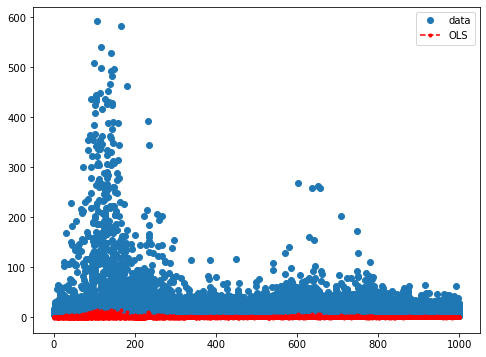

In [348]:
x = np.linspace(0,1000,len(Y))
y_fitted = result_ols.fittedvalues
res = Y - y_fitted
res = (res-res.mean())/res.std()
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, Y, 'o', label='data')
ax.plot(x, res, 'r--.',label='OLS')
ax.legend(loc='best')

**<font size=3>(5) The Fifth Model</font>**  

In these two models I drop insignificant feature Intereset.   
After that I plot a residual graph of the final model. Compared to the model earlier, the line is much more smooth 

In [350]:
bidsIndex = bidsIndex_0
bidsIndex = bidsIndex.drop(['AMOUNT',"loanId","MARRY_已婚","INTEREST"])
bidsIndex

Index(['INCOME', 'AGE', 'IND_制造业', 'CAR', 'WORKTIME', 'CREDIT',
       'PURPOSE_其他借款'],
      dtype='object')

In [351]:
X = data_2[bidsIndex]
Y = data_2["BIDS"]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result_ols = model.fit()
result_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BIDS   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     334.2
Date:                Fri, 24 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:35:44   Log-Likelihood:                -50356.
No. Observations:               10000   AIC:                         1.007e+05
Df Residuals:                    9992   BIC:                         1.008e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -55.6554      2.180    -25.527      0.000     -59.929     -51.382
INCOME           8.8782      0.304     29.178      0.000       8.282       9.475
AGE              0.8132      0.064     12.647      0.000       0.687       0.939
IND_制造业         14.8213      0.939     15.782      0.000      12.980      16.662
CAR              2.6880      0.836      3.215      0.001       1.049       4.327
WORKTIME         1.9524      0.419      4.664      0.000       1.132       2.773
CREDIT           1.4124      0.253      5.585      0.000       0.917       1.908
PURPOSE_其他借款    14.8417      1.775      8.360      0.000      11.362      18.322
==============================================================================
Omnibus:                    11562.235   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1281987.443
Skew:                           6.087   Prob(JB):                         0.00
Kurtosis:                      57.116   Cond. No.                         211.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

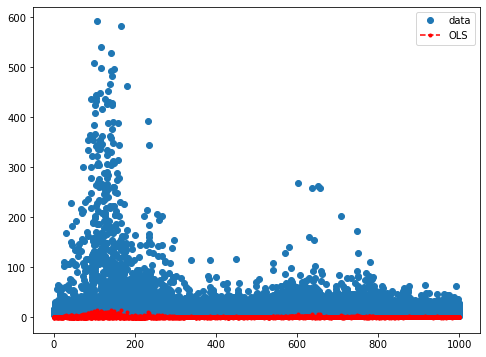

In [352]:
x = np.linspace(0,1000,len(Y))
y_fitted = result_ols.fittedvalues
res = Y - y_fitted
res = (res-res.mean())/res.std()
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, Y, 'o', label='data')
ax.plot(x, res, 'r--.',label='OLS')
ax.legend(loc='best')

<a id="2"></a>
## 2.P2P Lending Platform

<a id="2.1"></a>
## 2.1 P2P Lending Platform Data Summary
Data description: 1000 records X 17 columns

### Data operation
**(1) Genereate Duation feature**  
It is generated based on Open-time and Bankrupt-time, using integer to represent the result.   
For example Open time 2014/05/19 - Bankrupt-time Year 2017, we get Duration (20170000 - 201405190)   
  
**(2) Generate dummy variable**  
I generate dummy variable for Background including 4 types of background.  
  
**(3) Correlation test**  
Based on heat map, find if there is high correlation among features and it may lead to multicollinearity.  As a result I just kick one of the backgroud variable out of the table sicne they are highly related.   
  
**(4)Null value handle**   
There are some missing records in the features. In the statistic table I found the missing records exist in label feature, and the number is limited. So I simply fill these null values with its own median value.
  
   [Back to content](#0.1)

In [357]:
data_p2p = pd.read_csv(r"..\Week 2 Assignment\p2p.csv",encoding="gbk")
data_p2p.head()

,fullname,OnlineTime_YMD,Bankrupt_WDZJ,Province,City,Collapse,Benign,Fraud,RegCapital,Background,Capitaldeposit,Obtaininvest,Joinasso,Autobid,Transright,Riskdeposit,Thirdguarantee
0,123便利贷,20140519,2.017e+07,上海,上海,1,0.0,0.0,500.0,民营系,0,0.0,1.0,0,0,0.0,0.0
1,17聚财,20151231,2.017e+07,上海,上海,1,0.0,0.0,500.0,民营系,0,0.0,0.0,0,0,0.0,0.0
2,360易贷,20150504,2.016e+07,辽宁,沈阳,1,0.0,0.0,500.0,民营系,0,0.0,0.0,1,1,0.0,0.0
3,365储蓄家,20180310,2.018e+07,浙江,杭州,1,0.0,0.0,500.0,民营系,0,0.0,0.0,0,0,0.0,0.0
4,51丰收宝,20180320,2.018e+07,广东,深圳,1,0.0,1.0,5.0,民营系,0,0.0,0.0,0,0,0.0,0.0


In [358]:
data_p2p.shape

(1000, 17)

In [360]:
data_p2p.describe()

,OnlineTime_YMD,Bankrupt_WDZJ,Collapse,Benign,Fraud,RegCapital,Capitaldeposit,Obtaininvest,Joinasso,Autobid,Transright,Riskdeposit,Thirdguarantee
count,1.000e+03,7.820e+02,1000.000,782.000,782.000,1000.000,1000.000,968.000,968.000,1000.000,1000.000,968.000,968.000
mean,2.015e+07,2.016e+07,0.782,0.098,0.247,596.064,0.191,0.027,0.055,0.244,0.177,0.022,0.034
std,1.135e+04,1.304e+04,0.413,0.298,0.431,2328.222,0.393,0.162,0.228,0.430,0.382,0.146,0.182
min,2.009e+07,2.012e+07,0.000,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.014e+07,2.015e+07,1.000,0.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,2.015e+07,2.016e+07,1.000,0.000,0.000,300.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,2.015e+07,2.017e+07,1.000,0.000,0.000,500.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,2.018e+07,2.019e+07,1.000,1.000,1.000,50000.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


**Generate Duration feature baed on OnlineTime and bankrupt time**

In [366]:
data_p2p["endtime"] = data_p2p["Bankrupt_WDZJ"]
data_p2p["endtime"][data_p2p["endtime"].isnull()] = 20210000
data_p2p["Duration"] = data_p2p["endtime"] - data_p2p["OnlineTime_YMD"]
data_p2p.describe()["Duration"]

<ipython-input-366-d566a584de42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p2p["endtime"][data_p2p["endtime"].isnull()] = 20210000


count      1000.000
mean      24984.026
std       22517.608
min           0.000
25%        9604.750
50%       19517.500
75%       39737.250
max      108987.000
Name: Duration, dtype: float64

**Generate Dummy variabel for Background**

In [372]:
data_p2p = pd.get_dummies(data_p2p,columns=["Background"])

**Correlationship test**

In [376]:
abs(data_p2p.corr()["Collapse"]).sort_values(ascending=False)
collapse_index_0 = abs(data_p2p.corr()["Collapse"]).sort_values(ascending=False).index[3:16]
collapse_index_0


Collapse           1.000
endtime            0.858
Duration           0.821
Capitaldeposit     0.477
Joinasso           0.231
Background_民营系     0.214
Transright         0.174
Background_上市公司    0.164
Background_国企背景    0.138
Obtaininvest       0.092
Autobid            0.078
Thirdguarantee     0.077
OnlineTime_YMD     0.070
Background_风投系     0.061
Riskdeposit        0.032
RegCapital         0.028
Bankrupt_WDZJ        NaN
Benign               NaN
Fraud                NaN
Name: Collapse, dtype: float64

Index(['Capitaldeposit', 'Joinasso', 'Background_民营系', 'Transright',
       'Background_上市公司', 'Background_国企背景', 'Obtaininvest', 'Autobid',
       'Thirdguarantee', 'OnlineTime_YMD', 'Background_风投系', 'Riskdeposit',
       'RegCapital'],
      dtype='object')

**(3) Correlation test**  
Based on heat map, find if there is high correlation among features and it may lead to multicollinearity.  As a result I just kick one of the backgroud variable out of the table sicne they are highly related.  

<AxesSubplot:>

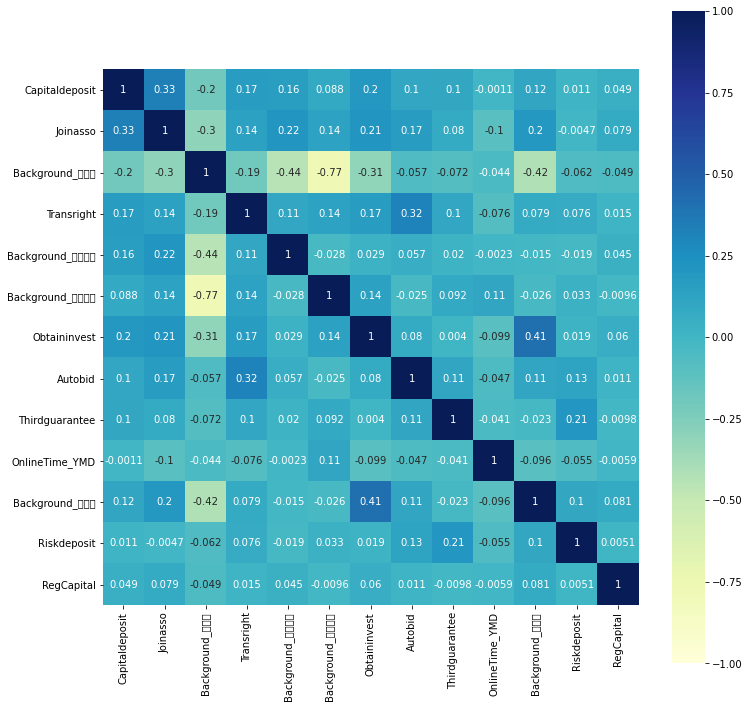

In [378]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(data_p2p[collapse_index_0].corr(),annot=True, vmax=1, vmin=-1,square=True,cmap="YlGnBu")

In [379]:
collapse_index_0 = collapse_index_0.drop("Background_上市公司")
collapse_index_0

Index(['Capitaldeposit', 'Joinasso', 'Background_民营系', 'Transright',
       'Background_国企背景', 'Obtaininvest', 'Autobid', 'Thirdguarantee',
       'OnlineTime_YMD', 'Background_风投系', 'Riskdeposit', 'RegCapital'],
      dtype='object')

In [380]:
data_p2p.describe()[collapse_index_0]

,Capitaldeposit,Joinasso,Background_民营系,Transright,Background_国企背景,Obtaininvest,Autobid,Thirdguarantee,OnlineTime_YMD,Background_风投系,Riskdeposit,RegCapital
count,1000.000,968.000,1000.000,1000.000,1000.000,968.000,1000.000,968.000,1.000e+03,1000.000,968.000,1000.000
mean,0.191,0.055,0.924,0.177,0.046,0.027,0.244,0.034,2.015e+07,0.014,0.022,596.064
std,0.393,0.228,0.265,0.382,0.210,0.162,0.430,0.182,1.135e+04,0.118,0.146,2328.222
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.009e+07,0.000,0.000,2.000
25%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.014e+07,0.000,0.000,100.000
50%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.015e+07,0.000,0.000,300.000
75%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.015e+07,0.000,0.000,500.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.018e+07,1.000,1.000,50000.000


### Fill numm value with median

In [382]:
for index in collapse_index_0:
    data_p2p[index][data_p2p[index].isnull()] = data_p2p[index].median()
data_p2p.describe()[collapse_index_0]

<ipython-input-382-6be0ba80bab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p2p[index][data_p2p[index].isnull()] = data_p2p[index].median()
<ipython-input-382-6be0ba80bab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p2p[index][data_p2p[index].isnull()] = data_p2p[index].median()
<ipython-input-382-6be0ba80bab6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p2p[index][data_p2p[index].isnull()] = data_p2p[in

,Capitaldeposit,Joinasso,Background_民营系,Transright,Background_国企背景,Obtaininvest,Autobid,Thirdguarantee,OnlineTime_YMD,Background_风投系,Riskdeposit,RegCapital
count,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1000.000,1.000e+03,1000.000,1000.000,1000.000
mean,0.191,0.053,0.924,0.177,0.046,0.026,0.244,0.033,2.015e+07,0.014,0.021,596.064
std,0.393,0.224,0.265,0.382,0.210,0.159,0.430,0.179,1.135e+04,0.118,0.143,2328.222
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.009e+07,0.000,0.000,2.000
25%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.014e+07,0.000,0.000,100.000
50%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.015e+07,0.000,0.000,300.000
75%,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,2.015e+07,0.000,0.000,500.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.018e+07,1.000,1.000,50000.000


<a id="2.2"></a>
## 2.2 Cox model
features are significant(p<=0.5): Joinasso, Background_民营, Transright,Autobid  
    (1) When a commpany has joined the associate, it is 0.63 times to collapse  
    (2) When a company is private it is 3.08 times more likely to collapse  
    (3) If a company provides bonds transfering, it is 0.62 times as same as those not to collapse  
    (4) If a firm provides auto-bid it is 0.83 times as same as those not to collapse  
   
   [Back to content](#0.1)

In [386]:
from lifelines import CoxPHFitter

In [392]:
collapse_index_0

Index(['Capitaldeposit', 'Joinasso', 'Background_民营系', 'Transright',
       'Background_国企背景', 'Obtaininvest', 'Autobid', 'Thirdguarantee',
       'OnlineTime_YMD', 'Background_风投系', 'Riskdeposit', 'RegCapital'],
      dtype='object')

In [395]:
data_cox = data_p2p[['Capitaldeposit', 'Joinasso', 'Background_民营系', 'Transright',
       'Background_国企背景', 'Obtaininvest', 'Autobid', 'Thirdguarantee',
        'Background_风投系', 'Riskdeposit', 'RegCapital',"Duration","Collapse"]]

In [396]:
cph = CoxPHFitter()
cph.fit(data_cox, 'Duration', event_col='Collapse')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 218 right-censored observations>

<lifelines.CoxPHFitter: fitted with 1000 total observations, 218 right-censored observations>
             duration col = 'Duration'
                event col = 'Collapse'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 782
   partial log-likelihood = -4770.93
         time fit was run = 2021-09-24 12:14:45 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Capitaldeposit   -1.51       0.22       0.13            -1.76            -1.26                 0.17                 0.28
Joinasso         -0.46       0.63       0.23            -0.91            -0.01                 0.40                 0.99
Background_民营系    1.12       3.08       0.51             0.13             2.12                 1.14                 8.32
Transright       -0.47       0.62       0.11            -0.68            -0.26                 0.50                 0.77
Background_国企背景   0.59       1.80       0.54            -0.48             1.65                 0.62                 5.21
Obtaininvest      0.08       1.09       0.28            -0.47             0.64                 0.62                 1.90
Autobid          -0.19       0.83       0.09            -0.37            -0.01                 0.69                 0.99
Thirdguarantee   -0.17       0.85       0.23            -0.61             0.28                 0.54                 1.32
Background_风投系    0.80       2.23       0.62            -0.41             2.02                 0.66                 7.53
Riskdeposit      -0.10       0.90       0.27            -0.63             0.42                 0.53                 1.52
RegCapital        0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

                     z      p   -log2(p)
covariate                               
Capitaldeposit  -11.77 <0.005     103.82
Joinasso         -2.00   0.05       4.45
Background_民营系    2.22   0.03       5.23
Transright       -4.38 <0.005      16.39
Background_国企背景   1.08   0.28       1.83
Obtaininvest      0.29   0.77       0.38
Autobid          -2.09   0.04       4.79
Thirdguarantee   -0.74   0.46       1.12
Background_风投系    1.29   0.20       2.35
Riskdeposit      -0.39   0.70       0.52
RegCapital        0.31   0.75       0.41
---
Concordance = 0.68
Partial AIC = 9563.85
log-likelihood ratio test = 327.07 on 11 df
-log2(p) of ll-ratio test = 208.51

<AxesSubplot:xlabel='log(HR) (95% CI)'>

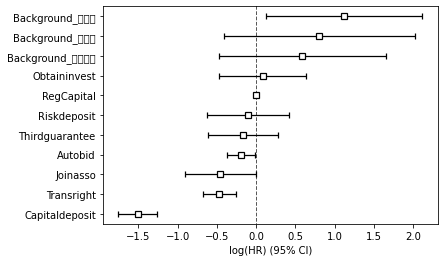

In [399]:
cph.plot()